In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

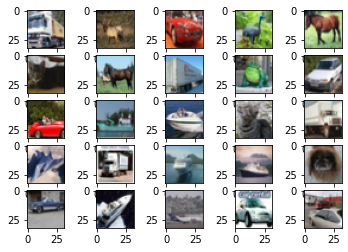

In [5]:

xmax = ymax = 5
im_index = [1, 3, 5, 6, 7,
            9, 12, 15, 19, 46,
            99, 111, 222, 333, 444,
            555, 666, 777, 888, 999,
            10000, 20000, 30000, 40000, 49999]
fig, axs = plt.subplots(xmax, ymax)
for x in range(xmax):
  for y in range(ymax):
    axs[x, y].imshow(x_train[im_index[x*5+y]])


In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_train = to_categorical(y_train, 10)

In [12]:
y_cat_test = to_categorical(y_test, 10)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [18]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4892 - accuracy: 0.4637 - val_loss: 1.2841 - val_accuracy: 0.5357
Epoch 2/15
1563/1563 [==============================] - 59s 37ms/step - loss: 1.1707 - accuracy: 0.5869 - val_loss: 1.1677 - val_accuracy: 0.5851
Epoch 3/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0225 - accuracy: 0.6426 - val_loss: 1.0874 - val_accuracy: 0.6193
Epoch 4/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9128 - accuracy: 0.6814 - val_loss: 1.0443 - val_accuracy: 0.6432
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8216 - accuracy: 0.7128 - val_loss: 0.9859 - val_accuracy: 0.6643
Epoch 6/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7402 - accuracy: 0.7414 - val_loss: 1.0369 - val_accuracy: 0.6564
Epoch 7/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6609 - accuracy: 0.7695 - val_loss: 0.9918 -

In [19]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.489177,0.46366,1.284084,0.5357
1,1.170709,0.58692,1.167715,0.5851
2,1.022520,0.64258,1.087442,0.6193
3,0.912813,0.68144,1.044265,0.6432
4,0.821569,0.71278,0.985910,0.6643
5,0.740158,0.74142,1.036861,0.6564
6,0.660868,0.76950,0.991808,0.6754


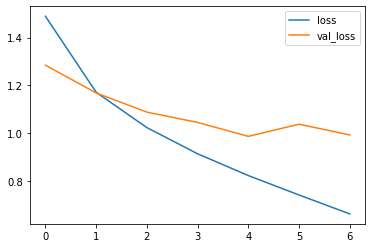

In [20]:
metrics[["loss", "val_loss"]].plot()

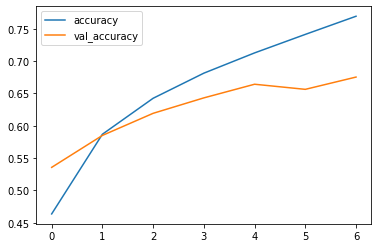

In [21]:
metrics[["accuracy", "val_accuracy"]].plot()

In [22]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9918 - accuracy: 0.6754


[0.9918078184127808, 0.6754000186920166]

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1000
           1       0.78      0.76      0.77      1000
           2       0.59      0.55      0.57      1000
           3       0.46      0.53      0.49      1000
           4       0.62      0.64      0.63      1000
           5       0.55      0.60      0.57      1000
           6       0.86      0.67      0.76      1000
           7       0.77      0.71      0.74      1000
           8       0.77      0.79      0.78      1000
           9       0.67      0.82      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [26]:
print(confusion_matrix(y_test, predictions))

[[668  33  61  36  25   6   4  11  85  71]
 [ 12 756   7  16   4   4   6   4  31 160]
 [ 48  15 547  88  99  94  42  29  17  21]
 [  9  15  77 534  82 190  21  26  18  28]
 [  8  10  65  94 644  51  22  77  22   7]
 [ 11   5  49 207  54 600   5  44  11  14]
 [  6  16  57  99  58  64 674   9   6  11]
 [ 16   8  36  50  66  70   3 714   7  30]
 [ 44  46  11  19   8  12   4   5 792  59]
 [ 15  63  13  17   2   9   4  13  39 825]]


In [27]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


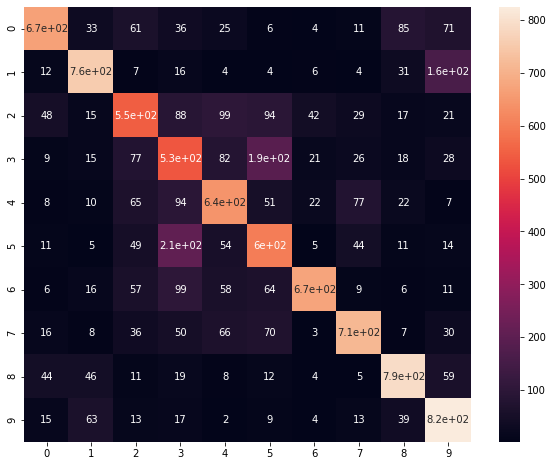

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True)

In [31]:
my_image = x_test[0]

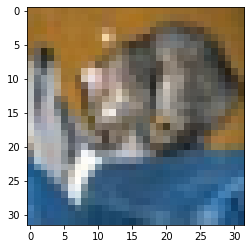

In [32]:
plt.imshow(my_image)

In [33]:
y_test[0]

array([3], dtype=uint8)

In [34]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3])